In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import os
import re
import seaborn as sn

# Funciones para hacer cálculo estadístico
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn packages
from sklearn.preprocessing import StandardScaler # Análisis de PCA
from sklearn import metrics # Calcula métricas para un modelo
from sklearn import tree # Cálculo de decision trees
from sklearn.tree import DecisionTreeClassifier # Generación de modelos de decision tree
from sklearn.tree import DecisionTreeRegressor # Generación de modelos de decision tree
from sklearn.ensemble import BaggingClassifier # Generación de modelos de bagging
from sklearn.ensemble import BaggingRegressor # Generación de modelos de bagging
from sklearn.ensemble import RandomForestClassifier # Generación de modelo de random forest
from sklearn.ensemble import RandomForestRegressor # Generación de modelo de random forest
from sklearn.ensemble import StackingRegressor # Generación de modelo de random forest
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo


# Models
# import lightgbm as lgb
import catboost as cat
# import xgboost as xgb

# Confusion matrix viz
from mlxtend.evaluate import confusion_matrix # Calcula la matriz de confusion 
from mlxtend.plotting import plot_confusion_matrix #plot de la matriz de confusión
# from mlxtend.classifier import StackingClassifier #stacking classifier

# Shap library
import shap
# print the JS visualization code to the notebook 
shap.initjs()

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook

import ipywidgets
import datetime
import calendar

import pingouin as pg
from scipy import stats

import plotly.express as px
from sklearn.decomposition import PCA
import random

# plt.style.use('seaborn')
# plt.figure(figsize=(25,8))
pd.set_option('display.max_columns',100)
pd.set_option('display.max_row',100)

In [2]:
imported_data = pd.read_csv("baseClean2.csv", sep=";")
# imported_data.drop(['Unnamed: 0'],axis=1,inplace=True)
imported_data.head(15)


,COUNTY,VICTIM,KILLER,YEAR,MONTH,DAY,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICOCCUP,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUOCCU,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..
0,CALAVERAS,"RODRIGUEZ, V","CATARNI, P",54,12,2,UNKN.HOUR,SATURDAY,HISPANIC,MALE,26,MINER,UNKN.VICCOND,WHITE,MALE,11,MINER,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,STREET,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
1,CALAVERAS,"JACKSON, W","MILLER, N",54,12,28,UNKN.HOUR,THURSDAY,WHITE,MALE,39,UNKN.VICOCCUP,UNKN.VICCOND,WHITE,MALE,17,UNKN.ACCUOCCU,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,VICTIM'S HOME,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
2,CALAVERAS,"OMANCE, A","AMAYA, J",55,2,4,UNKN.HOUR,SUNDAY,HISPANIC,MALE,54,UNKN.VICOCCUP,UNKN.VICCOND,HISPANIC,MALE,22,MINER,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
3,CALAVERAS,"NORTON, S","BECK, J",54,8,26,6 PM-9 PM,SATURDAY,WHITE,MALE,39,MINER,AGITATED,WHITE,MALE,17,MINER,AGITATED,FRIENDS,QUARREL,BLUNT INSTRUMENT,MINE,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
4,CALAVERAS,"BROOKS, E",UNKN.KILLER,55,3,23,UNKN.HOUR,FRIDAY,WHITE,MALE,41,UNKN.VICOCCUP,UNKN.VICCOND,UNKN.ACCURACE,UNKN.ACCUSEX,17,UNKN.ACCUOCCU,UNKN.ACCUCOND,UNKN.RELATION,UNKN.CAUSE,SHARP INSTRUMENT,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
5,CALAVERAS,"FLYNN, J","STEWART, W",55,3,25,3 AM-6 AM,SUNDAY,WHITE,MALE,44,UNKN.VICOCCUP,UNKN.VICCOND,WHITE,MALE,17,UNKN.ACCUOCCU,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
6,CALAVERAS,"SHEPHERD, C","WILLIAMS, J",55,5,27,9 PM-12 MIDNIGHT,SUNDAY,WHITE,MALE,44,MINER,DRINKING,WHITE,MALE,17,MINER,DRINKING,FRIENDS,QUARREL,HAND GUN,VICTIM'S HOME,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
7,CALAVERAS,"BROWN, J",UNKN.KILLER,55,3,17,9 PM-12 MIDNIGHT,SATURDAY,ORIENTAL,MALE,41,MINER,UNKN.VICCOND,UNKN.ACCURACE,UNKN.ACCUSEX,17,UNKN.ACCUOCCU,UNKN.ACCUCOND,UNKN.RELATION,UNKN.CAUSE,HAND GUN,MINE,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
8,CALAVERAS,DOMINGO,LYNCH MOB,51,11,15,9 PM-12 MIDNIGHT,SATURDAY,HISPANIC,MALE,34,UNKN.VICOCCUP,AGITATED,WHITE,MALE,15,UNKN.ACCUOCCU,AGITATED,STRANGERS,LYNCH MOB,HANGING,COUNTRY ROAD,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
9,CALAVERAS,UNKN.VICTIM,LYNCH MOB,52,2,11,3 PM-6PM,WEDNESDAY,WHITE,MALE,20,UNKN.VICOCCUP,AGITATED,WHITE,MALE,15,UNKN.ACCUOCCU,AGITATED,STRANGERS,LYNCH MOB,HANGING,VICTIM'S HOME,44742,22371,22371,1020.01,92.2,8.8,28892,92.8


Primero realizamos una prueba con modelos que requieran de variables categóricas. Para ello separamos valores categóricos de numéricos.

In [3]:
data = imported_data.drop(["VICTIM", 
                        "KILLER", 
                        "DAY"], axis=1) # inplace=True

In [4]:
def season(x):
    if x < 0:
        return "unknown"
    elif ((x >= 3) & (x < 6)):
        return "spring"
    elif ((x >= 6) & (x < 9)):
        return "summer"
    elif ((x >= 9) & (x < 12)):
        return "fall"
    elif ((x >= 1) & (x < 3)):
        return "winter"
    elif ((x == 12)):
        return "winter"
    else:
        return "unknown"

func1 = np.vectorize(season)
data['SEASON'] = func1(data['MONTH'])

# def sex(x): # onehot
#     if x == "MALE":
#         return 1
#     elif (x == "FEMALE"):
#         return 2
#     else:
#         return 0
# 
# func3 = np.vectorize(sex)
# data['ACCUSEX'] = pd.to_numeric(func3(data['ACCUSEX']))
# data['VICSEX'] = pd.to_numeric(func3(data['VICSEX']))

In [5]:
data.head()

,COUNTY,YEAR,MONTH,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICOCCUP,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUOCCU,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,SEASON
0,CALAVERAS,54,12,UNKN.HOUR,SATURDAY,HISPANIC,MALE,26,MINER,UNKN.VICCOND,WHITE,MALE,11,MINER,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,STREET,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,winter
1,CALAVERAS,54,12,UNKN.HOUR,THURSDAY,WHITE,MALE,39,UNKN.VICOCCUP,UNKN.VICCOND,WHITE,MALE,17,UNKN.ACCUOCCU,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,VICTIM'S HOME,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,winter
2,CALAVERAS,55,2,UNKN.HOUR,SUNDAY,HISPANIC,MALE,54,UNKN.VICOCCUP,UNKN.VICCOND,HISPANIC,MALE,22,MINER,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,winter
3,CALAVERAS,54,8,6 PM-9 PM,SATURDAY,WHITE,MALE,39,MINER,AGITATED,WHITE,MALE,17,MINER,AGITATED,FRIENDS,QUARREL,BLUNT INSTRUMENT,MINE,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,summer
4,CALAVERAS,55,3,UNKN.HOUR,FRIDAY,WHITE,MALE,41,UNKN.VICOCCUP,UNKN.VICCOND,UNKN.ACCURACE,UNKN.ACCUSEX,17,UNKN.ACCUOCCU,UNKN.ACCUCOND,UNKN.RELATION,UNKN.CAUSE,SHARP INSTRUMENT,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,spring


In [6]:
data["VICOCCUP"].value_counts().head()

UNKN.VICOCCUP    658
MINER            161
LABORER           66
HOUSEWIFE         52
FARMER            44
Name: VICOCCUP, dtype: int64

In [7]:
data["ACCUOCCU"].value_counts().head()

UNKN.ACCUOCCU    700
MINER            137
LABORER          108
FARMER            51
LAWMAN            48
Name: ACCUOCCU, dtype: int64

In [8]:
data = data.drop(["VICOCCUP", "ACCUOCCU"], axis=1) # inplace=True

In [9]:
rowdroppin = []
for i in range(len(data)-1):
    if ("UNKN" in data[i:i+1]["HOUR"].to_string()) and ("UNKN" in data[i:(i+1)]["WEAPON"].to_string()) and ("UNKN" in data[i:(i+1)]["CAUSE"].to_string()):
        rowdroppin.append(i)
for i in range(len(data)-1):
    if ("UNKN" in data[i:i+1]["ACCURACE"].to_string()) and ("UNKN" in data[i:(i+1)]["ACCUSEX"].to_string()):
        rowdroppin.append(i)

In [10]:
rowdroppin = list(set(rowdroppin))
len(rowdroppin)

166

In [11]:
data = data.drop(rowdroppin)

In [12]:
data.head()

,COUNTY,YEAR,MONTH,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,SEASON
0,CALAVERAS,54,12,UNKN.HOUR,SATURDAY,HISPANIC,MALE,26,UNKN.VICCOND,WHITE,MALE,11,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,STREET,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,winter
1,CALAVERAS,54,12,UNKN.HOUR,THURSDAY,WHITE,MALE,39,UNKN.VICCOND,WHITE,MALE,17,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,VICTIM'S HOME,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,winter
2,CALAVERAS,55,2,UNKN.HOUR,SUNDAY,HISPANIC,MALE,54,UNKN.VICCOND,HISPANIC,MALE,22,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,winter
3,CALAVERAS,54,8,6 PM-9 PM,SATURDAY,WHITE,MALE,39,AGITATED,WHITE,MALE,17,AGITATED,FRIENDS,QUARREL,BLUNT INSTRUMENT,MINE,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,summer
5,CALAVERAS,55,3,3 AM-6 AM,SUNDAY,WHITE,MALE,44,UNKN.VICCOND,WHITE,MALE,17,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,UNKN.LOCATION,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,spring


----------
# Cat and num separation

In [13]:
cat_features = ["COUNTY", "HOUR","WEEKDAY", "VICRACE", "VICCOND", "ACCURACE","ACCUCOND","RELATION", "CAUSE", "WEAPON","LOCATION","SEASON","ACCUSEX", "VICSEX"]
data_numeric = data.drop(cat_features, axis = 1)
data_numeric

,YEAR,MONTH,VICAGE,ACCUAGE,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..
0,54,12,26,11,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
1,54,12,39,17,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
2,55,2,54,22,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
3,54,8,39,17,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
5,55,3,44,17,44742,22371,22371,1020.01,92.2,8.8,28892,92.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1309,99,8,35,40,54008,25707,28300,2220.88,91.1,9.9,26043,88.4
1310,63,3,24,28,54008,25707,28300,2220.88,91.1,9.9,26043,88.4
1311,63,7,28,23,54008,25707,28300,2220.88,91.1,9.9,26043,88.4
1312,63,7,34,24,54008,25707,28300,2220.88,91.1,9.9,26043,88.4


In [14]:
num_features = ["MONTH", "VICSEX","VICAGE", "ACCUSEX", "ACCUAGE", "POPULATION","LAND.AREA.km2.","PERCAPITA.MONEY.INCOME..","HIGH.SCHOOL.GRADUATE..25..","WHITE.ALONE..","OTHER.RACES..","NUM.WOMEN","NUM.MEN","YEAR"]
data_categoric = data.drop(num_features, axis = 1)
data_categoric

,COUNTY,HOUR,WEEKDAY,VICRACE,VICCOND,ACCURACE,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,SEASON
0,CALAVERAS,UNKN.HOUR,SATURDAY,HISPANIC,UNKN.VICCOND,WHITE,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,STREET,winter
1,CALAVERAS,UNKN.HOUR,THURSDAY,WHITE,UNKN.VICCOND,WHITE,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,VICTIM'S HOME,winter
2,CALAVERAS,UNKN.HOUR,SUNDAY,HISPANIC,UNKN.VICCOND,HISPANIC,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,UNKN.LOCATION,winter
3,CALAVERAS,6 PM-9 PM,SATURDAY,WHITE,AGITATED,WHITE,AGITATED,FRIENDS,QUARREL,BLUNT INSTRUMENT,MINE,summer
5,CALAVERAS,3 AM-6 AM,SUNDAY,WHITE,UNKN.VICCOND,WHITE,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,UNKN.LOCATION,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
1309,TUOLUMNE,9 AM-12 NOON,FRIDAY,WHITE,CALM,WHITE,AGITATED,FRIENDS,QUARREL,HAND GUN,STREET,summer
1310,TUOLUMNE,UNKN.HOUR,SUNDAY,ORIENTAL,UNKN.VICCOND,HISPANIC,UNKN.ACCUCOND,STRANGERS,ROBBERY,UNKN.WEAPON,MINE,spring
1311,TUOLUMNE,UNKN.HOUR,WEDNESDAY,WHITE,UNKN.VICCOND,WHITE,UNKN.ACCUCOND,UNKN.RELATION,QUARREL,KNIFE,MINE,summer
1312,TUOLUMNE,UNKN.HOUR,THURSDAY,WHITE,UNKN.VICCOND,WHITE,UNKN.ACCUCOND,FRIENDS,QUARREL,KNIFE,UNKN.LOCATION,summer


In [15]:
data_categoric_encoded = pd.get_dummies(data_categoric.drop(['ACCURACE'], axis = 1))
OHEd_data = pd.concat([data_numeric, data_categoric_encoded, data_categoric['ACCURACE']],axis=1)
OHEd_data

,YEAR,MONTH,VICAGE,ACCUAGE,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,COUNTY_CALAVERAS,COUNTY_SACRAMENTO,COUNTY_SAN DIEGO,COUNTY_SAN JOAQUIN,COUNTY_SAN LUIS OBISPO,COUNTY_SANTA BARBARA,COUNTY_TUOLUMNE,HOUR_12 MIDNIGHT-3 AM,HOUR_12 NOON-3 PM,HOUR_3 AM-6 AM,HOUR_3 PM-6PM,HOUR_6 AM-9 AM,HOUR_6 PM-9 PM,HOUR_9 AM-12 NOON,HOUR_9 PM-12 MIDNIGHT,HOUR_UNKN.HOUR,WEEKDAY_FRIDAY,WEEKDAY_MONDAY,WEEKDAY_SATURDAY,WEEKDAY_SUNDAY,WEEKDAY_THURSDAY,WEEKDAY_TUESDAY,WEEKDAY_UNKN.WEEKDAY,WEEKDAY_WEDNESDAY,VICRACE_AFRICAN-AMERICAN,VICRACE_HISPANIC,VICRACE_NATIVE AMERICAN,VICRACE_ORIENTAL,VICRACE_UNKN.VICRACE,VICRACE_WHITE,VICCOND_AGITATED,VICCOND_CALM,VICCOND_DRINKING,VICCOND_OTHER,VICCOND_OTHER DRUGS,VICCOND_UNKN.VICCOND,ACCUCOND_AGITATED,ACCUCOND_CALM,...,WEAPON_THROWN DOWN,WEAPON_UNKN.WEAPON,LOCATION_ACCUSED HOME,LOCATION_ASYLUM,LOCATION_BANK,LOCATION_BEACH,LOCATION_BLACKSMITH SHOP,LOCATION_BROTHEL,LOCATION_CABIN (RURAL),LOCATION_CEMETARY,LOCATION_COUNTRY ROAD,LOCATION_COURTHOUSE,LOCATION_DANCE HALL,LOCATION_DESERT,LOCATION_FARM,LOCATION_HOSPITAL,LOCATION_HOTEL,LOCATION_INDIAN RESERVE,LOCATION_JAIL,LOCATION_LAKE,LOCATION_MINE,LOCATION_MISSION,LOCATION_MOUNTAINS,LOCATION_OCEAN,LOCATION_OTHER BUILDING,LOCATION_OTHER BUSINESS,LOCATION_OTHER HOUSE,LOCATION_PARK,LOCATION_PRISON,LOCATION_RAILROAD,LOCATION_RANCH,LOCATION_RESTAURANT,LOCATION_RIVER,LOCATION_ROOMING HOUSE,LOCATION_SALOON,LOCATION_SAW MILL,LOCATION_SHIP,LOCATION_STABLE OR CORRAL,LOCATION_STATE BUILDING,LOCATION_STORE,LOCATION_STREET,LOCATION_UNKN.LOCATION,LOCATION_VICTIM'S HOME,LOCATION_WHARF,LOCATION_WOODS,SEASON_fall,SEASON_spring,SEASON_summer,SEASON_winter,ACCURACE
0,54,12,26,11,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,WHITE
1,54,12,39,17,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,WHITE
2,55,2,54,22,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,HISPANIC
3,54,8,39,17,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,WHITE
5,55,3,44,17,44742,22371,22371,1020.01,92.2,8.8,28892,92.8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,99,8,35,40,54008,25707,28300,2220.88,91.1,9.9,26043,88.4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,WHITE
1310,63,3,24,28,54008,25707,28300,2220.88,91.1,9.9,26043,88.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,HISPANIC
1311,63,7,28,23,54008,25707,28300,2220.88,91.1,9.9,26043,88.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0

In [16]:
X = OHEd_data.drop(['ACCURACE'], axis = 1)
y = OHEd_data[['ACCURACE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Random Forrest

A continuación realizaremos el GridSearch para el Random Forrest para evaluar los mejores parámetros.

In [17]:
# we enumerate the values to try
parameters = [{"n_estimators":[5,10,50,100,150,200], "max_depth": [1,5,10,15]}]

#instantiate the classifier
rf_cv = RandomForestClassifier()

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=rf_cv, param_grid=parameters, scoring="accuracy", n_jobs=-1)
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 15, 'n_estimators': 150}

In [18]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
rf = RandomForestClassifier(n_estimators = 100, max_depth=15, n_jobs=-1) 
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(rf, X_train, y_train, cv = 10, scoring = "accuracy")
# for i, score in enumerate(model["test_score"]):
#     print(f"Accuracy for the fold no. {i} on the test set: {score}")

In [19]:
# ---------------------------------------------------------------------- #
# ---------------------------------------------------------------------- #
# ----------------- BLOQUE DE RESULTADOS DEL MODELO -------------------- #
# ---------------------------------------------------------------------- #
# ---------------------------------------------------------------------- #

In [20]:
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
# Error del modelo train
metrics.accuracy_score(y_train, y_pred_train)

0.9978260869565218

In [21]:
y_pred_test = rf.predict(X_test)
# Error de predicción
randomforrestR2 = metrics.accuracy_score(y_test, y_pred_test)
randomforrestR2

0.7913043478260869

In [22]:
y_train.value_counts()

ACCURACE        
WHITE               613
HISPANIC            138
ORIENTAL             79
NATIVE AMERICAN      74
AFRICAN-AMERICAN     14
UNKN.ACCURACE         2
dtype: int64

In [23]:
pd.DataFrame(y_pred_train).value_counts()

WHITE               615
HISPANIC            137
ORIENTAL             79
NATIVE AMERICAN      74
AFRICAN-AMERICAN     13
UNKN.ACCURACE         2
dtype: int64

In [24]:
y_test.value_counts()

ACCURACE        
WHITE               159
HISPANIC             33
NATIVE AMERICAN      21
ORIENTAL             12
AFRICAN-AMERICAN      3
UNKN.ACCURACE         2
dtype: int64

In [25]:
pd.DataFrame(y_pred_test).value_counts()

WHITE              178
HISPANIC            32
ORIENTAL            11
NATIVE AMERICAN      9
dtype: int64

In [26]:
explainer_rf = shap.TreeExplainer(rf)
shap_values = explainer_rf.shap_values(X_train)

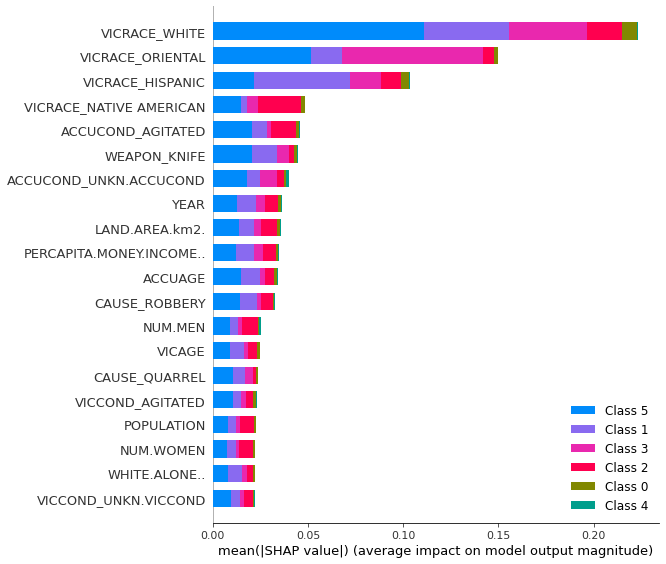

In [27]:
shap.summary_plot(shap_values, X_train)

In [28]:
pd.DataFrame(rf.classes_)

,0
0,AFRICAN-AMERICAN
1,HISPANIC
2,NATIVE AMERICAN
3,ORIENTAL
4,UNKN.ACCURACE
5,WHITE


In [29]:
# Mostrar el registro 0 en X_train desde OHEd_data
OHEd_data.loc[[X_train.iloc[16,:].name]]

,YEAR,MONTH,VICAGE,ACCUAGE,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,COUNTY_CALAVERAS,COUNTY_SACRAMENTO,COUNTY_SAN DIEGO,COUNTY_SAN JOAQUIN,COUNTY_SAN LUIS OBISPO,COUNTY_SANTA BARBARA,COUNTY_TUOLUMNE,HOUR_12 MIDNIGHT-3 AM,HOUR_12 NOON-3 PM,HOUR_3 AM-6 AM,HOUR_3 PM-6PM,HOUR_6 AM-9 AM,HOUR_6 PM-9 PM,HOUR_9 AM-12 NOON,HOUR_9 PM-12 MIDNIGHT,HOUR_UNKN.HOUR,WEEKDAY_FRIDAY,WEEKDAY_MONDAY,WEEKDAY_SATURDAY,WEEKDAY_SUNDAY,WEEKDAY_THURSDAY,WEEKDAY_TUESDAY,WEEKDAY_UNKN.WEEKDAY,WEEKDAY_WEDNESDAY,VICRACE_AFRICAN-AMERICAN,VICRACE_HISPANIC,VICRACE_NATIVE AMERICAN,VICRACE_ORIENTAL,VICRACE_UNKN.VICRACE,VICRACE_WHITE,VICCOND_AGITATED,VICCOND_CALM,VICCOND_DRINKING,VICCOND_OTHER,VICCOND_OTHER DRUGS,VICCOND_UNKN.VICCOND,ACCUCOND_AGITATED,ACCUCOND_CALM,...,WEAPON_THROWN DOWN,WEAPON_UNKN.WEAPON,LOCATION_ACCUSED HOME,LOCATION_ASYLUM,LOCATION_BANK,LOCATION_BEACH,LOCATION_BLACKSMITH SHOP,LOCATION_BROTHEL,LOCATION_CABIN (RURAL),LOCATION_CEMETARY,LOCATION_COUNTRY ROAD,LOCATION_COURTHOUSE,LOCATION_DANCE HALL,LOCATION_DESERT,LOCATION_FARM,LOCATION_HOSPITAL,LOCATION_HOTEL,LOCATION_INDIAN RESERVE,LOCATION_JAIL,LOCATION_LAKE,LOCATION_MINE,LOCATION_MISSION,LOCATION_MOUNTAINS,LOCATION_OCEAN,LOCATION_OTHER BUILDING,LOCATION_OTHER BUSINESS,LOCATION_OTHER HOUSE,LOCATION_PARK,LOCATION_PRISON,LOCATION_RAILROAD,LOCATION_RANCH,LOCATION_RESTAURANT,LOCATION_RIVER,LOCATION_ROOMING HOUSE,LOCATION_SALOON,LOCATION_SAW MILL,LOCATION_SHIP,LOCATION_STABLE OR CORRAL,LOCATION_STATE BUILDING,LOCATION_STORE,LOCATION_STREET,LOCATION_UNKN.LOCATION,LOCATION_VICTIM'S HOME,LOCATION_WHARF,LOCATION_WOODS,SEASON_fall,SEASON_spring,SEASON_summer,SEASON_winter,ACCURACE
965,83,11,24,46,431249,214330,216919,2735.09,86.1,13.9,30114,79.7,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,HISPANIC


In [30]:
thisex_class="HISPANIC"
thisex_examp=16
shap.force_plot(explainer_rf.expected_value[int(np.where(rf.classes_ == thisex_class)[0])], shap_values[int(np.where(rf.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

In [31]:
# Mostrar el registro 0 en X_train desde OHEd_data
OHEd_data.loc[[X_train.iloc[0,:].name]]

,YEAR,MONTH,VICAGE,ACCUAGE,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,COUNTY_CALAVERAS,COUNTY_SACRAMENTO,COUNTY_SAN DIEGO,COUNTY_SAN JOAQUIN,COUNTY_SAN LUIS OBISPO,COUNTY_SANTA BARBARA,COUNTY_TUOLUMNE,HOUR_12 MIDNIGHT-3 AM,HOUR_12 NOON-3 PM,HOUR_3 AM-6 AM,HOUR_3 PM-6PM,HOUR_6 AM-9 AM,HOUR_6 PM-9 PM,HOUR_9 AM-12 NOON,HOUR_9 PM-12 MIDNIGHT,HOUR_UNKN.HOUR,WEEKDAY_FRIDAY,WEEKDAY_MONDAY,WEEKDAY_SATURDAY,WEEKDAY_SUNDAY,WEEKDAY_THURSDAY,WEEKDAY_TUESDAY,WEEKDAY_UNKN.WEEKDAY,WEEKDAY_WEDNESDAY,VICRACE_AFRICAN-AMERICAN,VICRACE_HISPANIC,VICRACE_NATIVE AMERICAN,VICRACE_ORIENTAL,VICRACE_UNKN.VICRACE,VICRACE_WHITE,VICCOND_AGITATED,VICCOND_CALM,VICCOND_DRINKING,VICCOND_OTHER,VICCOND_OTHER DRUGS,VICCOND_UNKN.VICCOND,ACCUCOND_AGITATED,ACCUCOND_CALM,...,WEAPON_THROWN DOWN,WEAPON_UNKN.WEAPON,LOCATION_ACCUSED HOME,LOCATION_ASYLUM,LOCATION_BANK,LOCATION_BEACH,LOCATION_BLACKSMITH SHOP,LOCATION_BROTHEL,LOCATION_CABIN (RURAL),LOCATION_CEMETARY,LOCATION_COUNTRY ROAD,LOCATION_COURTHOUSE,LOCATION_DANCE HALL,LOCATION_DESERT,LOCATION_FARM,LOCATION_HOSPITAL,LOCATION_HOTEL,LOCATION_INDIAN RESERVE,LOCATION_JAIL,LOCATION_LAKE,LOCATION_MINE,LOCATION_MISSION,LOCATION_MOUNTAINS,LOCATION_OCEAN,LOCATION_OTHER BUILDING,LOCATION_OTHER BUSINESS,LOCATION_OTHER HOUSE,LOCATION_PARK,LOCATION_PRISON,LOCATION_RAILROAD,LOCATION_RANCH,LOCATION_RESTAURANT,LOCATION_RIVER,LOCATION_ROOMING HOUSE,LOCATION_SALOON,LOCATION_SAW MILL,LOCATION_SHIP,LOCATION_STABLE OR CORRAL,LOCATION_STATE BUILDING,LOCATION_STORE,LOCATION_STREET,LOCATION_UNKN.LOCATION,LOCATION_VICTIM'S HOME,LOCATION_WHARF,LOCATION_WOODS,SEASON_fall,SEASON_spring,SEASON_summer,SEASON_winter,ACCURACE
1028,51,6,16,13,54008,25707,28300,2220.88,91.1,9.9,26043,88.4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,WHITE


In [32]:
thisex_class="WHITE"
thisex_examp=0
shap.force_plot(explainer_rf.expected_value[int(np.where(rf.classes_ == thisex_class)[0])], shap_values[int(np.where(rf.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

In [33]:
# Mostrar el registro 0 en X_train desde OHEd_data
OHEd_data.loc[[X_train.iloc[1,:].name]]

,YEAR,MONTH,VICAGE,ACCUAGE,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,COUNTY_CALAVERAS,COUNTY_SACRAMENTO,COUNTY_SAN DIEGO,COUNTY_SAN JOAQUIN,COUNTY_SAN LUIS OBISPO,COUNTY_SANTA BARBARA,COUNTY_TUOLUMNE,HOUR_12 MIDNIGHT-3 AM,HOUR_12 NOON-3 PM,HOUR_3 AM-6 AM,HOUR_3 PM-6PM,HOUR_6 AM-9 AM,HOUR_6 PM-9 PM,HOUR_9 AM-12 NOON,HOUR_9 PM-12 MIDNIGHT,HOUR_UNKN.HOUR,WEEKDAY_FRIDAY,WEEKDAY_MONDAY,WEEKDAY_SATURDAY,WEEKDAY_SUNDAY,WEEKDAY_THURSDAY,WEEKDAY_TUESDAY,WEEKDAY_UNKN.WEEKDAY,WEEKDAY_WEDNESDAY,VICRACE_AFRICAN-AMERICAN,VICRACE_HISPANIC,VICRACE_NATIVE AMERICAN,VICRACE_ORIENTAL,VICRACE_UNKN.VICRACE,VICRACE_WHITE,VICCOND_AGITATED,VICCOND_CALM,VICCOND_DRINKING,VICCOND_OTHER,VICCOND_OTHER DRUGS,VICCOND_UNKN.VICCOND,ACCUCOND_AGITATED,ACCUCOND_CALM,...,WEAPON_THROWN DOWN,WEAPON_UNKN.WEAPON,LOCATION_ACCUSED HOME,LOCATION_ASYLUM,LOCATION_BANK,LOCATION_BEACH,LOCATION_BLACKSMITH SHOP,LOCATION_BROTHEL,LOCATION_CABIN (RURAL),LOCATION_CEMETARY,LOCATION_COUNTRY ROAD,LOCATION_COURTHOUSE,LOCATION_DANCE HALL,LOCATION_DESERT,LOCATION_FARM,LOCATION_HOSPITAL,LOCATION_HOTEL,LOCATION_INDIAN RESERVE,LOCATION_JAIL,LOCATION_LAKE,LOCATION_MINE,LOCATION_MISSION,LOCATION_MOUNTAINS,LOCATION_OCEAN,LOCATION_OTHER BUILDING,LOCATION_OTHER BUSINESS,LOCATION_OTHER HOUSE,LOCATION_PARK,LOCATION_PRISON,LOCATION_RAILROAD,LOCATION_RANCH,LOCATION_RESTAURANT,LOCATION_RIVER,LOCATION_ROOMING HOUSE,LOCATION_SALOON,LOCATION_SAW MILL,LOCATION_SHIP,LOCATION_STABLE OR CORRAL,LOCATION_STATE BUILDING,LOCATION_STORE,LOCATION_STREET,LOCATION_UNKN.LOCATION,LOCATION_VICTIM'S HOME,LOCATION_WHARF,LOCATION_WOODS,SEASON_fall,SEASON_spring,SEASON_summer,SEASON_winter,ACCURACE
160,51,2,21,15,1450121,739561,710559,964.64,65.3,14.7,26856,85.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,WHITE


In [34]:
thisex_class="WHITE"
thisex_examp=1
shap.force_plot(explainer_rf.expected_value[int(np.where(rf.classes_ == thisex_class)[0])], shap_values[int(np.where(rf.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

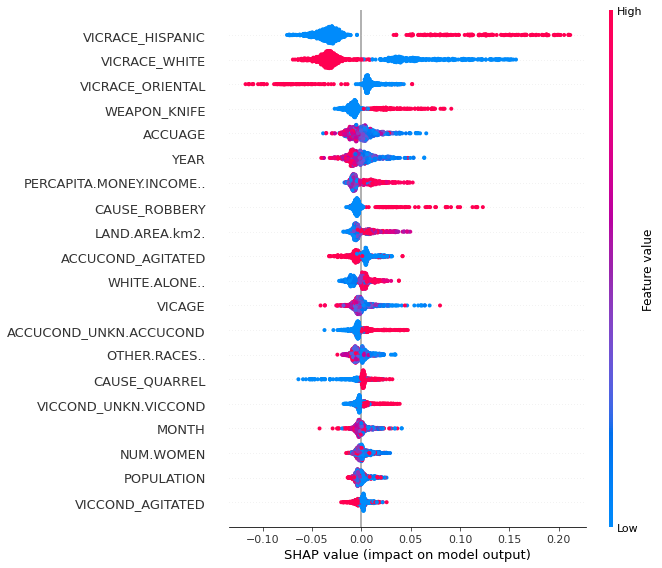

In [35]:
thisex_class="HISPANIC"
shap.summary_plot(shap_values[int(np.where(rf.classes_ == thisex_class)[0])], X_train)

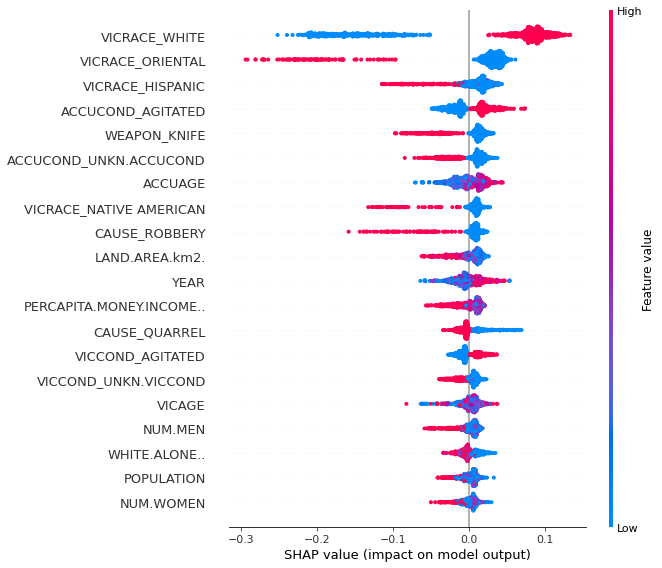

In [36]:
thisex_class="WHITE"
shap.summary_plot(shap_values[int(np.where(rf.classes_ == thisex_class)[0])], X_train)

# CATBOOST

In [37]:
X = data.drop(['ACCURACE'], axis = 1)
y = data[['ACCURACE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# create a train/test split with catboost
d_train_cat = cat.Pool(X_train, y_train, cat_features=["COUNTY", "HOUR","WEEKDAY", "VICRACE", "VICCOND","ACCUCOND","RELATION", "CAUSE", "WEAPON","LOCATION","SEASON","ACCUSEX", "VICSEX"])
d_test_cat = cat.Pool(X_test, y_test, cat_features=["COUNTY", "HOUR","WEEKDAY", "VICRACE", "VICCOND","ACCUCOND","RELATION", "CAUSE", "WEAPON","LOCATION","SEASON","ACCUSEX", "VICSEX"])

In [36]:
# model = cat.CatBoostClassifier(thread_count=-1)

# grid = {'learning_rate': [0.05, 0.025, 0.015, 0.01],
#         'depth': [6, 8, 10, 12]}

# grid_search_result = model.grid_search(grid, 
#                                       d_train_cat, 
#                                       plot=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


0:	learn: 1.6777963	test: 1.6908016	best: 1.6908016 (0)	total: 101ms	remaining: 1m 41s
1:	learn: 1.5835120	test: 1.6091689	best: 1.6091689 (1)	total: 134ms	remaining: 1m 6s
2:	learn: 1.5023367	test: 1.5367581	best: 1.5367581 (2)	total: 179ms	remaining: 59.6s
3:	learn: 1.4464769	test: 1.4848959	best: 1.4848959 (3)	total: 194ms	remaining: 48.3s
4:	learn: 1.3804515	test: 1.4231774	best: 1.4231774 (4)	total: 230ms	remaining: 45.7s
5:	learn: 1.3196200	test: 1.3681145	best: 1.3681145 (5)	total: 255ms	remaining: 42.3s
6:	learn: 1.2683672	test: 1.3219479	best: 1.3219479 (6)	total: 281ms	remaining: 39.9s
7:	learn: 1.2258742	test: 1.2843237	best: 1.2843237 (7)	total: 320ms	remaining: 39.6s
8:	learn: 1.1857240	test: 1.2457310	best: 1.2457310 (8)	total: 369ms	remaining: 40.6s
9:	learn: 1.1497418	test: 1.2173002	best: 1.2173002 (9)	total: 396ms	remaining: 39.2s
10:	learn: 1.1155060	test: 1.1870928	best: 1.1870928 (10)	total: 432ms	remaining: 38.9s
11:	learn: 1.0822926	test: 1.1548383	best: 1.154838

4:	learn: 1.3960781	test: 1.3940538	best: 1.3940538 (4)	total: 125ms	remaining: 24.9s
5:	learn: 1.3422349	test: 1.3400825	best: 1.3400825 (5)	total: 137ms	remaining: 22.6s
6:	learn: 1.2943986	test: 1.2917449	best: 1.2917449 (6)	total: 157ms	remaining: 22.3s
7:	learn: 1.2514045	test: 1.2480784	best: 1.2480784 (7)	total: 188ms	remaining: 23.3s
8:	learn: 1.2117636	test: 1.2095842	best: 1.2095842 (8)	total: 219ms	remaining: 24.1s
9:	learn: 1.1751819	test: 1.1745117	best: 1.1745117 (9)	total: 239ms	remaining: 23.7s
10:	learn: 1.1453352	test: 1.1480477	best: 1.1480477 (10)	total: 267ms	remaining: 24s
11:	learn: 1.1167146	test: 1.1203028	best: 1.1203028 (11)	total: 272ms	remaining: 22.4s
12:	learn: 1.0890481	test: 1.0946562	best: 1.0946562 (12)	total: 304ms	remaining: 23s
13:	learn: 1.0595665	test: 1.0683646	best: 1.0683646 (13)	total: 322ms	remaining: 22.7s
14:	learn: 1.0339167	test: 1.0421794	best: 1.0421794 (14)	total: 358ms	remaining: 23.5s
15:	learn: 1.0133001	test: 1.0262136	best: 1.026

2:	learn: 1.5022551	test: 1.4945872	best: 1.4945872 (2)	total: 53.5ms	remaining: 17.8s
3:	learn: 1.4327630	test: 1.4219932	best: 1.4219932 (3)	total: 66.2ms	remaining: 16.5s
4:	learn: 1.3855811	test: 1.3754445	best: 1.3754445 (4)	total: 68.5ms	remaining: 13.6s
5:	learn: 1.3318878	test: 1.3207360	best: 1.3207360 (5)	total: 78.5ms	remaining: 13s
6:	learn: 1.2934148	test: 1.2821415	best: 1.2821415 (6)	total: 116ms	remaining: 16.4s
7:	learn: 1.2507054	test: 1.2382134	best: 1.2382134 (7)	total: 122ms	remaining: 15.1s
8:	learn: 1.2123998	test: 1.1982407	best: 1.1982407 (8)	total: 153ms	remaining: 16.9s
9:	learn: 1.1813115	test: 1.1678607	best: 1.1678607 (9)	total: 214ms	remaining: 21.2s
10:	learn: 1.1503657	test: 1.1368046	best: 1.1368046 (10)	total: 275ms	remaining: 24.7s
11:	learn: 1.1241109	test: 1.1131369	best: 1.1131369 (11)	total: 305ms	remaining: 25.1s
12:	learn: 1.0989136	test: 1.0889615	best: 1.0889615 (12)	total: 330ms	remaining: 25.1s
13:	learn: 1.0711367	test: 1.0611695	best: 1.0

2:	learn: 1.5345150	test: 1.5203391	best: 1.5203391 (2)	total: 124ms	remaining: 41.2s
3:	learn: 1.4652419	test: 1.4495105	best: 1.4495105 (3)	total: 171ms	remaining: 42.7s
4:	learn: 1.3986100	test: 1.3829895	best: 1.3829895 (4)	total: 197ms	remaining: 39.1s
5:	learn: 1.3530414	test: 1.3389600	best: 1.3389600 (5)	total: 236ms	remaining: 39.1s
6:	learn: 1.3061735	test: 1.2939132	best: 1.2939132 (6)	total: 316ms	remaining: 44.8s
7:	learn: 1.2648242	test: 1.2593188	best: 1.2593188 (7)	total: 355ms	remaining: 44s
8:	learn: 1.2185925	test: 1.2136142	best: 1.2136142 (8)	total: 374ms	remaining: 41.2s
9:	learn: 1.1788884	test: 1.1730430	best: 1.1730430 (9)	total: 406ms	remaining: 40.2s
10:	learn: 1.1442228	test: 1.1393216	best: 1.1393216 (10)	total: 426ms	remaining: 38.3s
11:	learn: 1.1167626	test: 1.1120393	best: 1.1120393 (11)	total: 455ms	remaining: 37.4s
12:	learn: 1.0910056	test: 1.0902306	best: 1.0902306 (12)	total: 498ms	remaining: 37.8s
13:	learn: 1.0662445	test: 1.0664556	best: 1.06645

In [37]:
grid_search_result['params']

{'depth': 8, 'learning_rate': 0.05}

In [38]:
model_cat = cat.CatBoostClassifier(iterations = 300
                                   , learning_rate = 0.05
                                   , loss_function = "MultiClass"
                                   , random_seed = 2
                                   , depth = 8)

model_cat.fit(d_train_cat
                , eval_set = d_test_cat
                , verbose_eval=150
                , early_stopping_rounds=50 # Para el entrenamiento antes de hacer un overfitting automáticamente.
                , plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.6862857	test: 1.6852867	best: 1.6852867 (0)	total: 129ms	remaining: 38.5s
150:	learn: 0.3878943	test: 0.6125181	best: 0.6125181 (150)	total: 10.3s	remaining: 10.2s
299:	learn: 0.2454456	test: 0.6002598	best: 0.5982908 (279)	total: 20.1s	remaining: 0us

bestTest = 0.5982908384
bestIteration = 279

Shrink model to first 280 iterations.


In [39]:
# ---------------------------------------------------------------------- #
# ---------------------------------------------------------------------- #
# ----------------- BLOQUE DE RESULTADOS DEL MODELO -------------------- #
# ---------------------------------------------------------------------- #
# ---------------------------------------------------------------------- #

In [40]:
predictions = model_cat.predict(X_train)
catBoostAccuracy = metrics.classification_report(y_train, predictions)
print(catBoostAccuracy)

                  precision    recall  f1-score   support

AFRICAN-AMERICAN       1.00      0.07      0.13        14
        HISPANIC       0.80      0.65      0.72       138
 NATIVE AMERICAN       0.71      0.73      0.72        74
        ORIENTAL       0.92      0.91      0.92        79
   UNKN.ACCURACE       0.00      0.00      0.00         2
           WHITE       0.90      0.96      0.93       613

        accuracy                           0.88       920
       macro avg       0.72      0.55      0.57       920
    weighted avg       0.87      0.88      0.87       920



In [41]:
predictions = model_cat.predict(X_test)
catBoostAccuracy = metrics.classification_report(y_test, predictions)
print(catBoostAccuracy)

                  precision    recall  f1-score   support

AFRICAN-AMERICAN       0.00      0.00      0.00         3
        HISPANIC       0.50      0.48      0.49        33
 NATIVE AMERICAN       0.60      0.43      0.50        21
        ORIENTAL       0.91      0.83      0.87        12
   UNKN.ACCURACE       0.00      0.00      0.00         2
           WHITE       0.84      0.91      0.88       159

        accuracy                           0.78       230
       macro avg       0.48      0.44      0.46       230
    weighted avg       0.76      0.78      0.77       230



In [42]:
y_pred_train = model_cat.predict(X_train)
# Error del modelo train
metrics.accuracy_score(y_train, y_pred_train)

0.875

In [43]:
y_pred_test = model_cat.predict(X_test)
# Error de predicción
catAccu = metrics.accuracy_score(y_test, y_pred_test)
catAccu

0.782608695652174

In [44]:
y_train.value_counts()

ACCURACE        
WHITE               613
HISPANIC            138
ORIENTAL             79
NATIVE AMERICAN      74
AFRICAN-AMERICAN     14
UNKN.ACCURACE         2
dtype: int64

In [45]:
pd.DataFrame(y_pred_train).value_counts()

WHITE               653
HISPANIC            112
ORIENTAL             78
NATIVE AMERICAN      76
AFRICAN-AMERICAN      1
dtype: int64

In [46]:
y_test.value_counts()

ACCURACE        
WHITE               159
HISPANIC             33
NATIVE AMERICAN      21
ORIENTAL             12
AFRICAN-AMERICAN      3
UNKN.ACCURACE         2
dtype: int64

In [47]:
pd.DataFrame(y_pred_test).value_counts()

WHITE              172
HISPANIC            32
NATIVE AMERICAN     15
ORIENTAL            11
dtype: int64

In [48]:
explainer_cat = shap.TreeExplainer(model_cat)
shap_values = explainer_cat.shap_values(X_train)

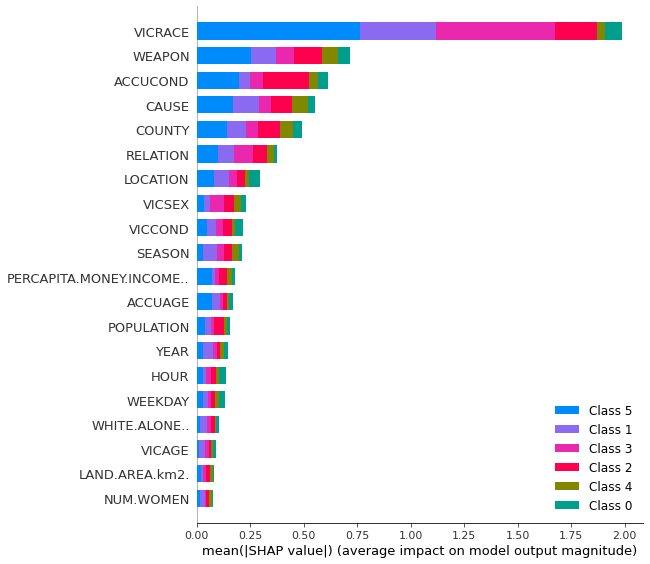

In [49]:
shap.summary_plot(shap_values, X_train)

In [50]:
pd.DataFrame(model_cat.classes_)

,0
0,AFRICAN-AMERICAN
1,HISPANIC
2,NATIVE AMERICAN
3,ORIENTAL
4,UNKN.ACCURACE
5,WHITE


In [51]:
# Mostrar el registro 0 en X_train desde data
data.loc[[X_train.iloc[16,:].name]]

,COUNTY,YEAR,MONTH,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,SEASON
965,SANTA BARBARA,83,11,6 PM-9 PM,MONDAY,HISPANIC,MALE,24,DRINKING,HISPANIC,MALE,46,DRINKING,FRIENDS,QUARREL,HAND GUN,SALOON,431249,214330,216919,2735.09,86.1,13.9,30114,79.7,fall


In [52]:
thisex_class="HISPANIC"
thisex_examp=16
shap.force_plot(explainer_cat.expected_value[int(np.where(model_cat.classes_ == thisex_class)[0])], shap_values[int(np.where(model_cat.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

In [53]:
# Mostrar el registro 0 en X_train desde data
data.loc[[X_train.iloc[0,:].name]]

,COUNTY,YEAR,MONTH,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,SEASON
1028,TUOLUMNE,51,6,6 PM-9 PM,SUNDAY,WHITE,MALE,16,AGITATED,WHITE,MALE,13,AGITATED,FRIENDS,LYNCH MOB,HANGING,JAIL,54008,25707,28300,2220.88,91.1,9.9,26043,88.4,summer


In [54]:
thisex_class="WHITE"
thisex_examp=0
shap.force_plot(explainer_cat.expected_value[int(np.where(model_cat.classes_ == thisex_class)[0])], shap_values[int(np.where(model_cat.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

In [55]:
# Mostrar el registro 0 en X_train desde data
data.loc[[X_train.iloc[1,:].name]]

,COUNTY,YEAR,MONTH,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,SEASON
160,SACRAMENTO,51,2,UNKN.HOUR,WEDNESDAY,WHITE,MALE,21,UNKN.VICCOND,WHITE,MALE,15,AGITATED,FRIENDS,QUARREL,HAND GUN,VICTIM'S HOME,1450121,739561,710559,964.64,65.3,14.7,26856,85.6,winter


In [56]:
thisex_class="WHITE"
thisex_examp=1
shap.force_plot(explainer_cat.expected_value[int(np.where(model_cat.classes_ == thisex_class)[0])], shap_values[int(np.where(model_cat.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

In [57]:
# Mostrar el registro 0 en X_train desde data
data.loc[[X_train.iloc[2,:].name]]

,COUNTY,YEAR,MONTH,HOUR,WEEKDAY,VICRACE,VICSEX,VICAGE,VICCOND,ACCURACE,ACCUSEX,ACCUAGE,ACCUCOND,RELATION,CAUSE,WEAPON,LOCATION,POPULATION,NUM.WOMEN,NUM.MEN,LAND.AREA.km2.,WHITE.ALONE..,OTHER.RACES..,PERCAPITA.MONEY.INCOME..,HIGH.SCHOOL.GRADUATE..25..,SEASON
385,SACRAMENTO,94,2,12 MIDNIGHT-3 AM,MONDAY,ORIENTAL,MALE,8,UNKN.VICCOND,ORIENTAL,MALE,3,UNKN.ACCUCOND,FRIENDS,QUARREL,HAND GUN,STREET,1450121,739561,710559,964.64,65.3,14.7,26856,85.6,winter


In [58]:
thisex_class="WHITE"
thisex_examp=2
shap.force_plot(explainer_cat.expected_value[int(np.where(model_cat.classes_ == thisex_class)[0])], shap_values[int(np.where(model_cat.classes_ == thisex_class)[0])][thisex_examp,:], X_train.iloc[thisex_examp,:])

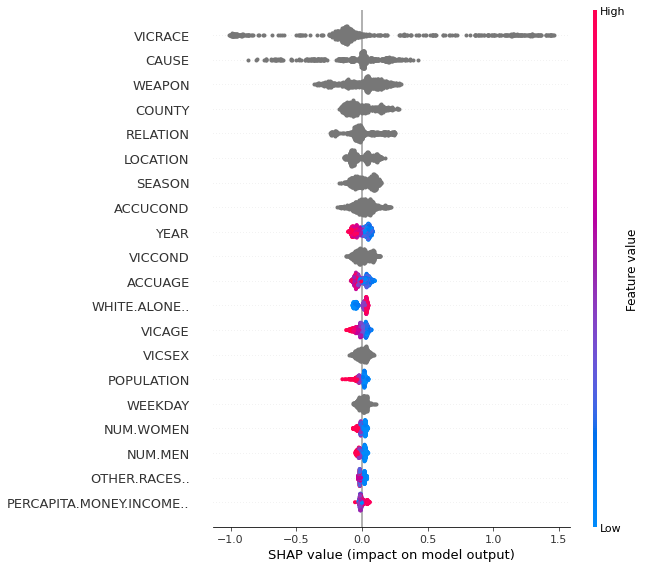

In [59]:
thisex_class="HISPANIC"
shap.summary_plot(shap_values[int(np.where(model_cat.classes_ == thisex_class)[0])], X_train)

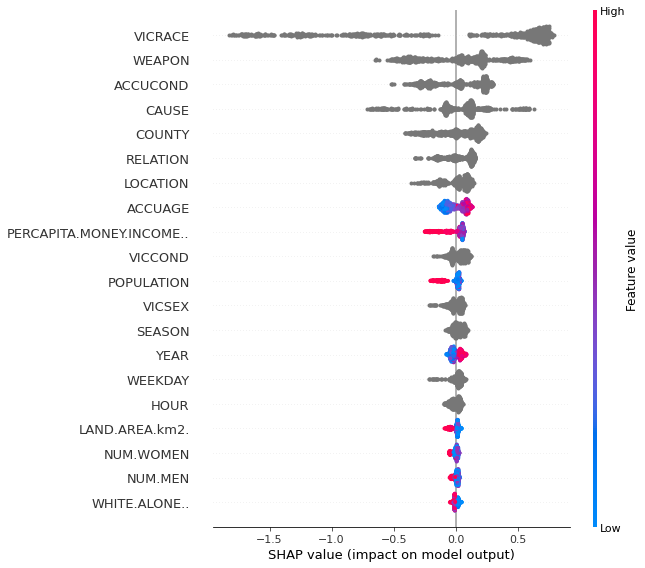

In [124]:
thisex_class="WHITE"
shap.summary_plot(shap_values[int(np.where(model_cat.classes_ == thisex_class)[0])], X_train)